
# 1. Data Understanding and Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\shant\\Downloads\\quant-nasdaq-project\\data\\NASDAQ Historical Prices.csv")

In [4]:
df.shape

(2577, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2577 non-null   object 
 1   Open       2577 non-null   float64
 2   High       2577 non-null   float64
 3   Low        2577 non-null   float64
 4   Close      2577 non-null   float64
 5   Adj Close  2577 non-null   float64
 6   Volume     2577 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.1+ KB


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,4160.029785,4160.959961,4131.790039,4143.069824,4143.069824,1738820000
1,2014-01-03,4148.560059,4152.959961,4124.959961,4131.910156,4131.910156,1667480000
2,2014-01-06,4137.029785,4139.779785,4103.750000,4113.680176,4113.680176,2292840000
3,2014-01-07,4128.569824,4158.180176,4126.479980,4153.180176,4153.180176,2278220000
4,2014-01-08,4154.279785,4171.750000,4145.000000,4165.609863,4165.609863,2345220000


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2.577000e+03
mean,8732.694091,8791.205699,8668.731742,8734.262208,8734.262208,3.164611e+09
std,3677.687970,3706.549415,3645.039075,3677.801153,3677.801153,1.567138e+09
min,4015.070068,4026.280029,3946.030029,3996.959961,3996.959961,7.068800e+08
25%,5147.870117,5167.540039,5122.779785,5153.580078,5153.580078,1.902460e+09
50%,7740.060059,7805.930176,7699.149902,7756.200195,7756.200195,2.316420e+09
75%,12010.450200,12101.849610,11898.360350,12031.879880,12031.879880,4.475090e+09
max,16517.240230,16538.859380,16393.900390,16428.820310,16428.820310,1.162119e+10


## 1.1 Exploratory Data Analysis

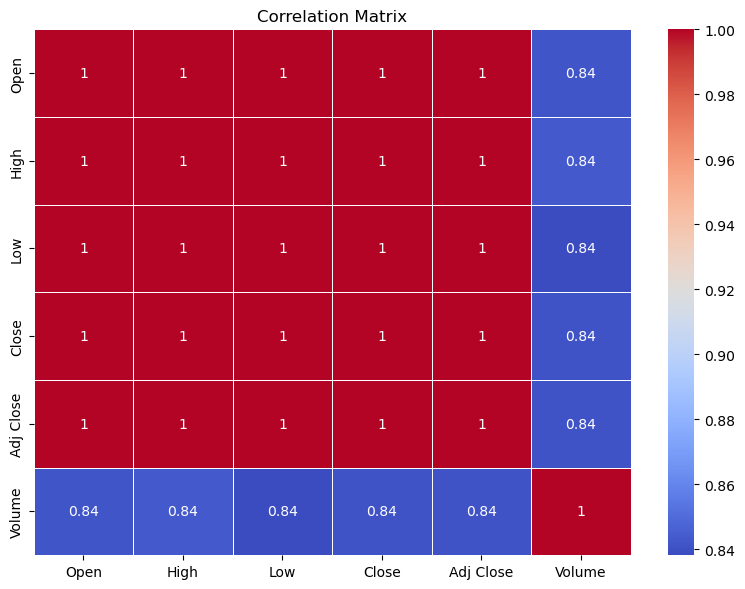

In [8]:
# Drop non-numeric columns like 'Date' or 'Symbol'
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now compute correlation
corr_matrix = numeric_df.corr()

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


#### The heatmap shows the correlation between different variables. Red colors typically indicate strong positive correlations, while blue colors indicate lower correlations.


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

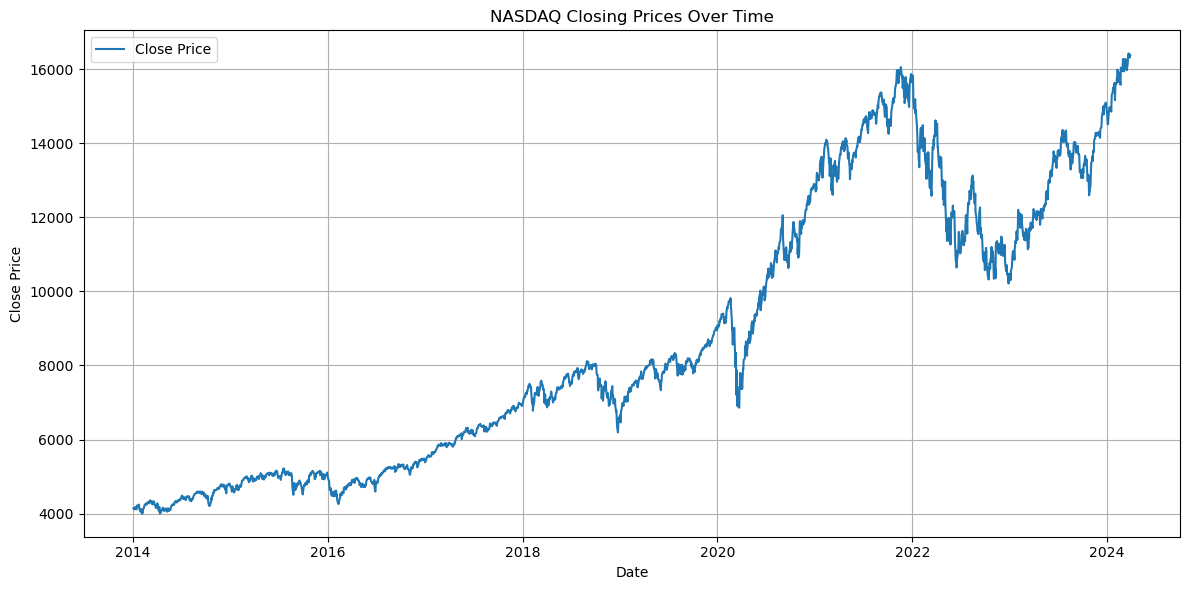

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('NASDAQ Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### The above line chart shows how Closing price  over time. The amount of Close Price  goes up with year

<Figure size 800x400 with 0 Axes>

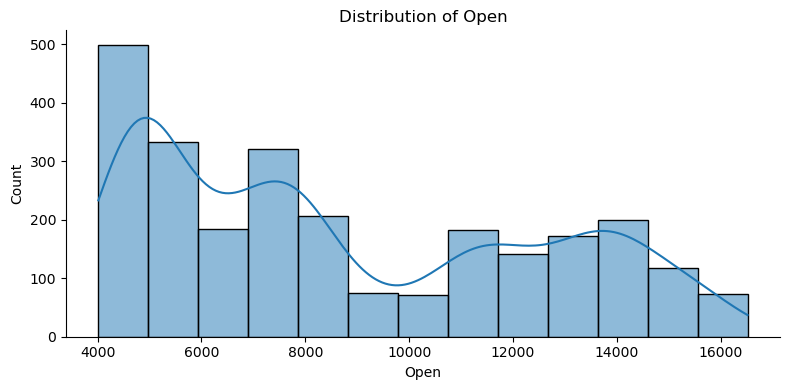

<Figure size 800x400 with 0 Axes>

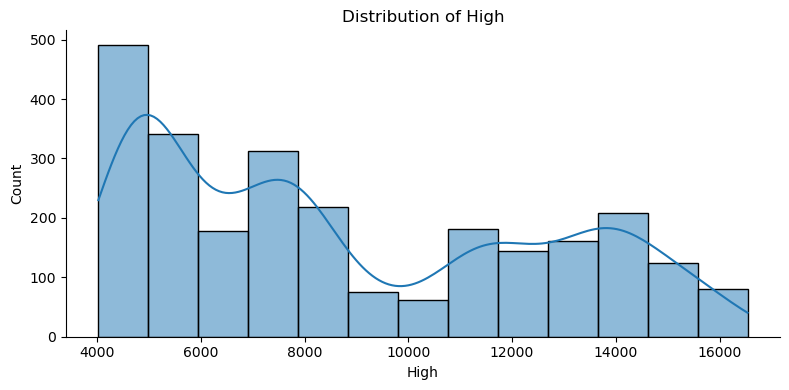

<Figure size 800x400 with 0 Axes>

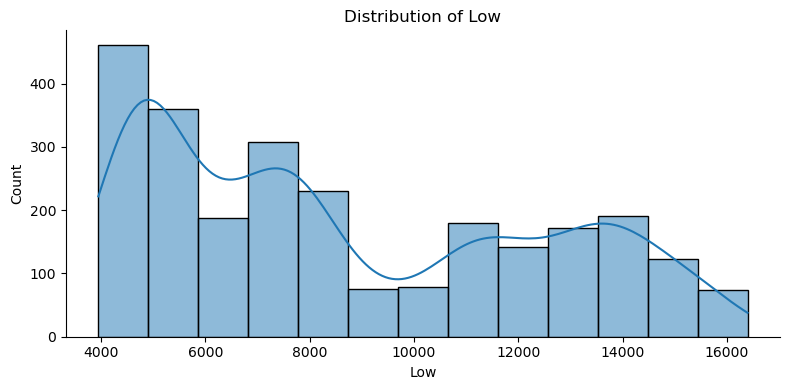

<Figure size 800x400 with 0 Axes>

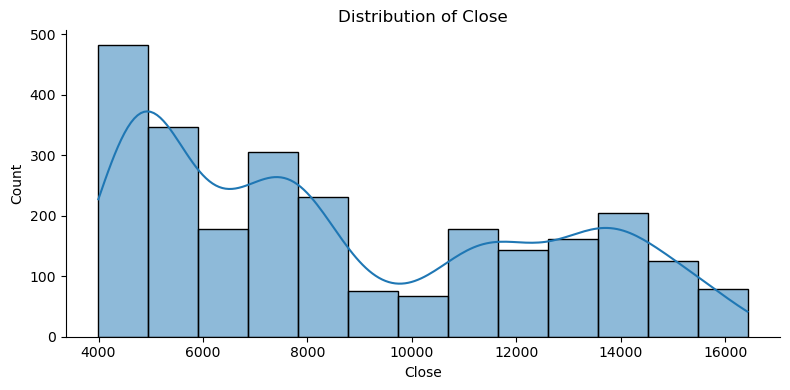

<Figure size 800x400 with 0 Axes>

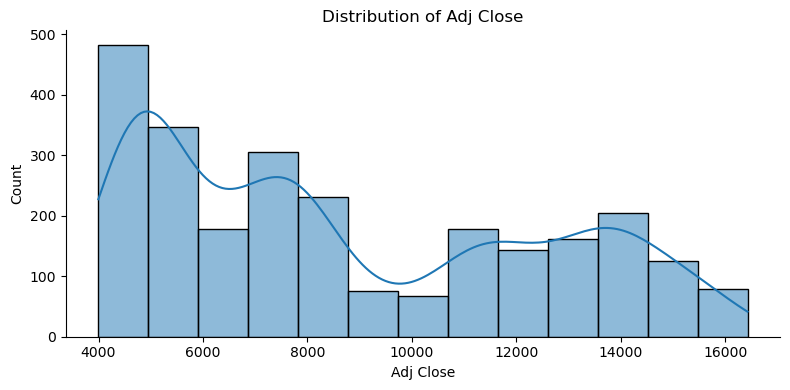

<Figure size 800x400 with 0 Axes>

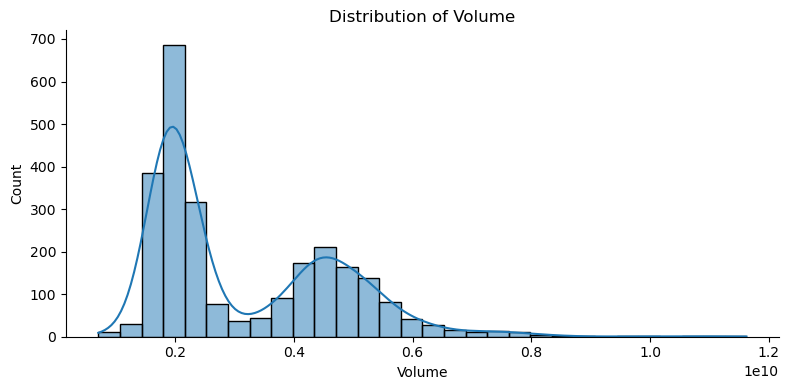

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.displot(df[col], kde=True, height=4, aspect=2)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


## 1.2 Handling Missing Values and Duplicates values

In [12]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


## 1.3 Outlier Detection and Treatment

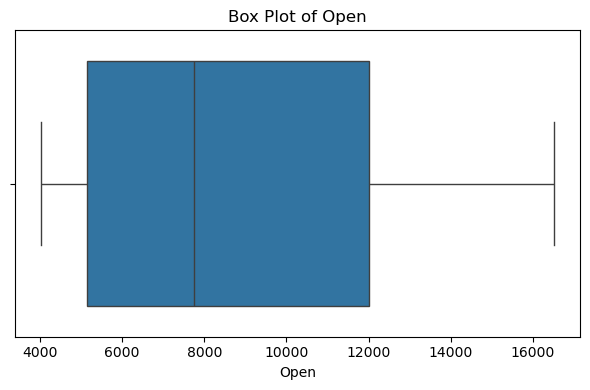

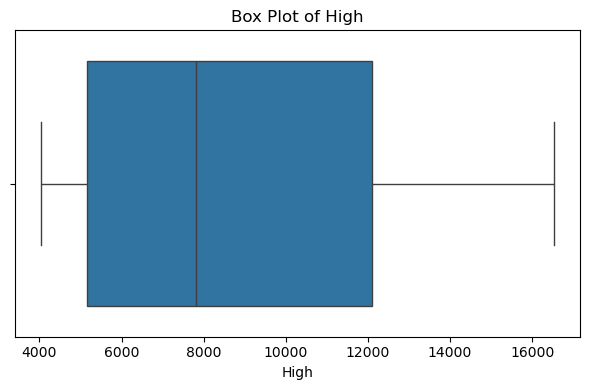

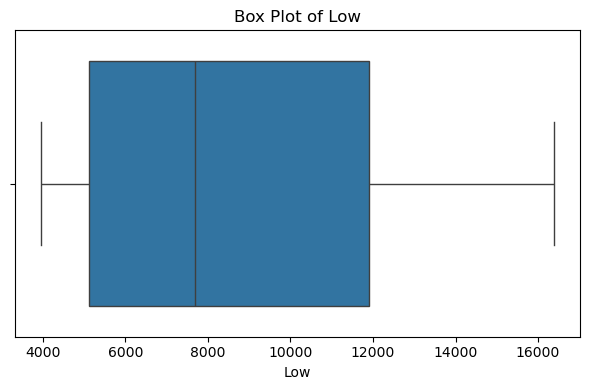

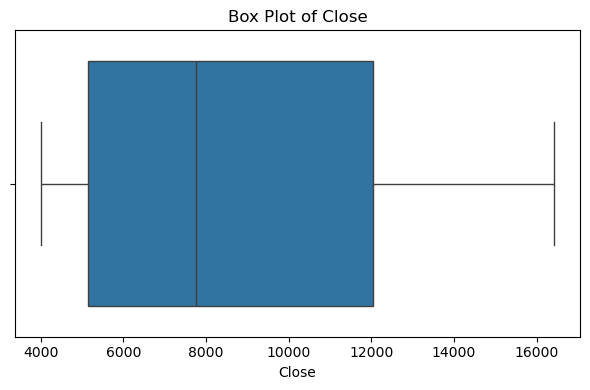

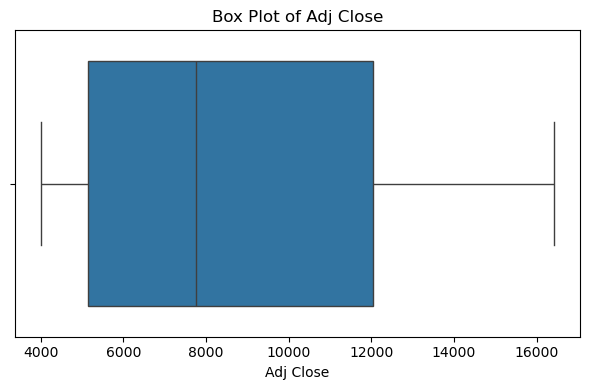

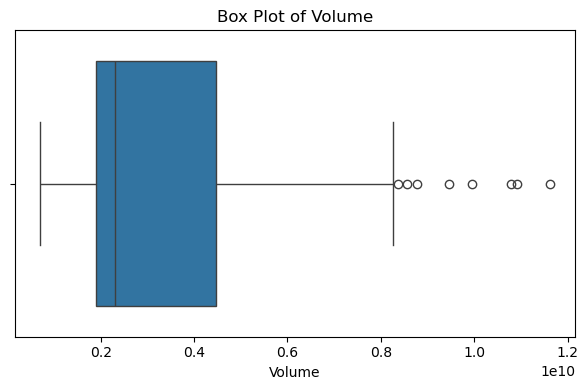

In [15]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

In [16]:
# IQR method for outlier capping in 'Volume'
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Volume'] = df['Volume'].clip(lower=lower_bound, upper=upper_bound)



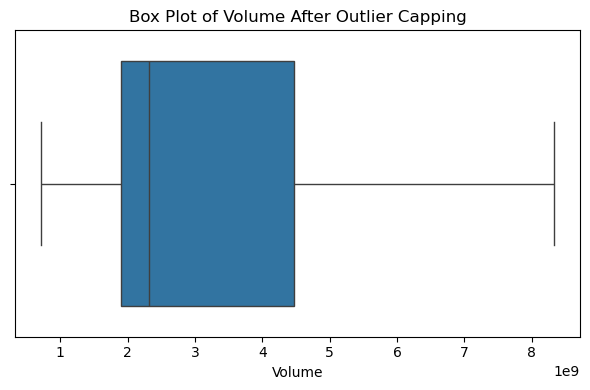

In [17]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Volume'])
plt.title('Box Plot of Volume After Outlier Capping')
plt.tight_layout()
plt.show()


## 1.4 Data Scaling and Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df is your original DataFrame
# Select numeric features for scaling
num_cols = [col for col in df.columns if col not in ['Date', 'Close']]

# Initialize scaler
scaler = MinMaxScaler()

# Create a copy of the original DataFrame to store scaled data
df_scaled = df.copy()

# Fit and transform the numeric columns
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Check the scaled result
print(df_scaled.head())

                Open      High       Low        Close  Adj Close    Volume
Date                                                                      
2014-01-02  0.011595  0.010764  0.014923  4143.069824   0.011753  0.135298
2014-01-03  0.010677  0.010124  0.014374  4131.910156   0.010855  0.125945
2014-01-06  0.009755  0.009071  0.012670  4113.680176   0.009389  0.207936
2014-01-07  0.009078  0.010541  0.014496  4153.180176   0.012566  0.206019
2014-01-08  0.011135  0.011626  0.015984  4165.609863   0.013566  0.214804


## 1.5 Data Splitting

In [20]:
# 1. Sort by date to preserve temporal order
df_scaled = df_scaled.sort_index()

# 2. Define features (X) and target (y)
feature_cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target_col = 'Close'

X = df_scaled[feature_cols]
y = df_scaled[target_col]

# 3. Determine the split index for 80/20 split
split_index = int(len(df_scaled) * 0.8)

# 4. Split the data (time-based)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# 5. Confirm the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2061, 5)
X_test shape: (516, 5)
y_train shape: (2061,)
y_test shape: (516,)


In [21]:
# Set your data folder path
data_folder = "C:\\Users\\shant\\Downloads\\quant-nasdaq-project\\data"

# 1. Save the entire scaled DataFrame (with Date index)
df_scaled.to_csv(f"{data_folder}\\NASDAQ_Scaled_Full.csv", index=True)




In [22]:
# 2. Save features (X) and target (y) as separate CSV files
X.to_csv(f"{data_folder}\\NASDAQ_Features_X.csv", index=True)
y.to_csv(f"{data_folder}\\NASDAQ_Target_y.csv", index=True)

print("Files saved successfully!")

Files saved successfully!
